In [8]:
!pip install kaggle

In [9]:
kaggle = '/content/kaggle.json'

In [10]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

print("Setup Kaggle API selesai!")

Setup Kaggle API selesai!


In [11]:
!kaggle datasets download -d olafkrastovski/handwritten-digits-0-9

Dataset URL: https://www.kaggle.com/datasets/olafkrastovski/handwritten-digits-0-9
License(s): CC0-1.0
  0% 0.00/66.7M [00:00<?, ?B/s]
100% 66.7M/66.7M [00:00<00:00, 2.80GB/s]


In [14]:
from zipfile import ZipFile
import os
file_name = 'handwritten-digits-0-9.zip'

extract_folder = "dataset"
os.makedirs(extract_folder, exist_ok=True)

with ZipFile(file_name, 'r') as zip:
  zip.extractall(extract_folder)
  print('Done')

Done


In [15]:
data_0 = os.listdir('/content/dataset/0')
data_1 = os.listdir('/content/dataset/1')
data_2 = os.listdir('/content/dataset/2')
data_3 = os.listdir('/content/dataset/3')
data_4 = os.listdir('/content/dataset/4')
data_5 = os.listdir('/content/dataset/5')
data_6 = os.listdir('/content/dataset/6')
data_7 = os.listdir('/content/dataset/7')
data_8 = os.listdir('/content/dataset/8')
data_9 = os.listdir('/content/dataset/9')

In [18]:
len(data_0)

2236

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping



Jumlah Data Train: (60000, 28, 28)
Jumlah Data Test: (10000, 28, 28)


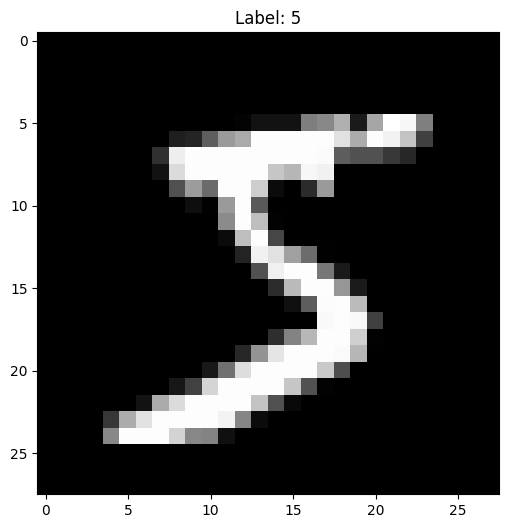

In [31]:
(X_train_raw, y_train_raw), (X_test_raw, y_test_raw) = mnist.load_data()

print(f"Jumlah Data Train: {X_train_raw.shape}")
print(f"Jumlah Data Test: {X_test_raw.shape}")

plt.imshow(X_train_raw[0], cmap='gray')
plt.title(f"Label: {y_train_raw[0]}")
plt.show()

In [36]:
feature_vector_length = 784 # 28 * 28
X_train = X_train_raw.reshape(X_train_raw.shape[0], feature_vector_length)
X_test = X_test_raw.reshape(X_test_raw.shape[0], feature_vector_length)

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

num_classes = 10
y_train = to_categorical(y_train_raw, num_classes)
y_test = to_categorical(y_test_raw, num_classes)

print(f"Shape setelah reshape: {X_train.shape}")
print(f"Contoh label one-hot: {y_train[0]}")

Shape setelah reshape: (60000, 784)
Contoh label one-hot: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [33]:
model = Sequential()

model.add(Dense(512, input_shape=(feature_vector_length,), activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=128,
                    validation_split=0.2, # 20% data train dipakai validasi
                    callbacks=[early_stop],
                    verbose=1)

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.8549 - loss: 0.4959 - val_accuracy: 0.9622 - val_loss: 0.1246
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9648 - loss: 0.1171 - val_accuracy: 0.9697 - val_loss: 0.1001
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9760 - loss: 0.0762 - val_accuracy: 0.9746 - val_loss: 0.0866
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9821 - loss: 0.0599 - val_accuracy: 0.9759 - val_loss: 0.0800
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9859 - loss: 0.0435 - val_accuracy: 0.9762 - val_loss: 0.0828
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9875 - loss: 0.0381 - val_accuracy: 0.9763 - val_loss: 0.0821
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9901 - loss: 0.0328 - val_accuracy: 0.9793 - val_loss: 0.0791
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9904 - loss: 0.0289 - val_acc

Test results - Loss: 0.06668882817029953 - Accuracy: 0.9803000092506409
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


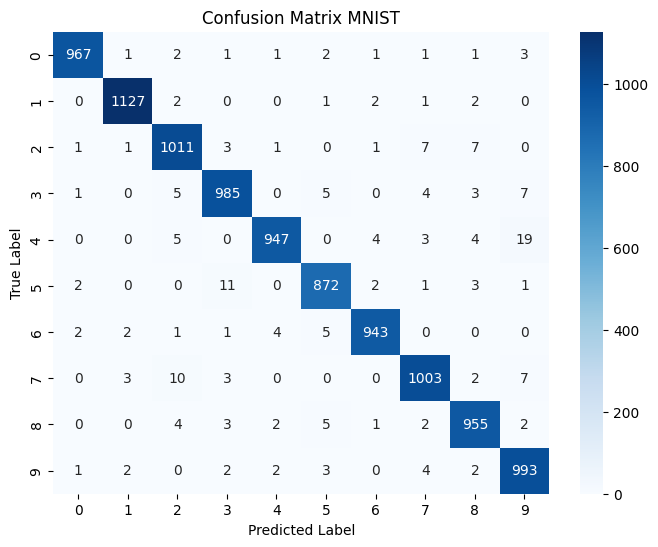

In [39]:
test_results = model.evaluate(X_test, y_test, verbose=0)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}')

# Confusion Matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix MNIST')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()